In [1]:
import numpy as np
from tqdm import tqdm, trange
import pandas as pd
import urllib.request
from urllib.error import HTTPError

from SGA import SGA

## Zadanie 4.
Wykorzystaj zaimplementowany algorytm do rozwiązywania problemu QAP. Użyj danych testowych z biblioteki QAPLIB. Przeprowadź obliczenia co najmniej dla następujących zestawów danych: Nug12, Nug14, ... Nug30, Tai50a, Tai60a, Tai80a. Przeanalizuj działanie algorytmu i otrzymane wyniki.

In [2]:
def get(name):
    instance_url = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/{name}.dat'
    
    qap_instance_file = urllib.request.urlopen(instance_url)
    
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    
    if name[:3] == 'nug':
        qap_instance_file.readline()
    
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    if name != 'tai50a':
        qap_instance_file.readline()
    
    for i in range(n):
        line = qap_instance_file.readline()
        if name == 'nug30':
            line += qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
        
        
    solution_url = f'http://anjos.mgi.polymtl.ca/qaplib/soln.d/{name}.sln'
    file = urllib.request.urlopen(solution_url)
    min_obj_func = int(file.readline().split()[1])
    
    return n, A, B, min_obj_func

In [3]:
def qap_objective_function(perm, n, flow, dists):
    s = 0.0
    for i in range(n):
        s += (flow[i, :] * dists[perm[i], perm]).sum()
    return s

In [4]:
def objective_function(perm, dists):
    return qap_objective_function(perm, n, flow, dists)

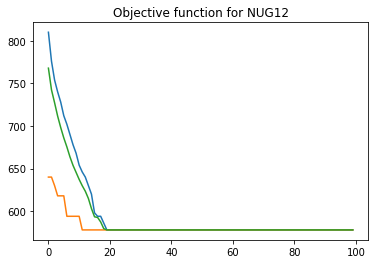

Min SGA: 578.0, minimum objective func: 578


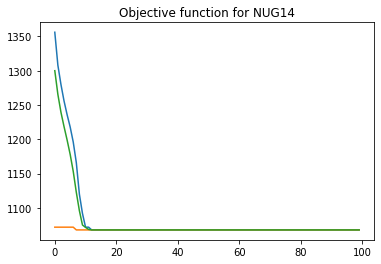

Min SGA: 1068.0, minimum objective func: 1014


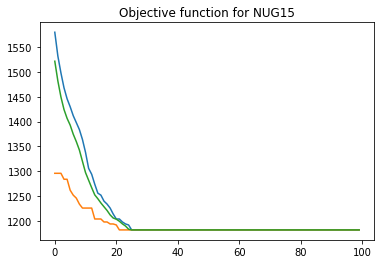

Min SGA: 1182.0, minimum objective func: 1150


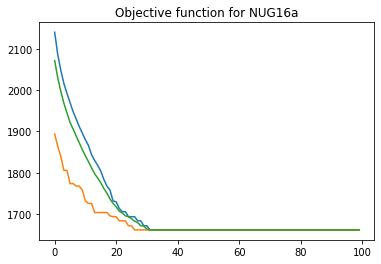

Min SGA: 1662.0, minimum objective func: 1610


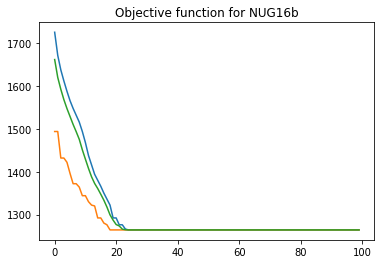

Min SGA: 1264.0, minimum objective func: 1240


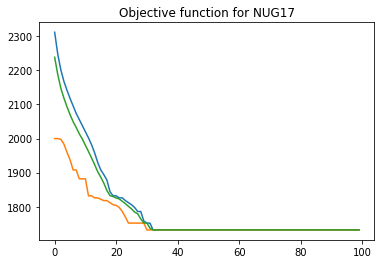

Min SGA: 1732.0, minimum objective func: 1732


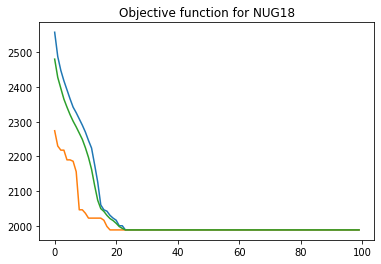

Min SGA: 1988.0, minimum objective func: 1930


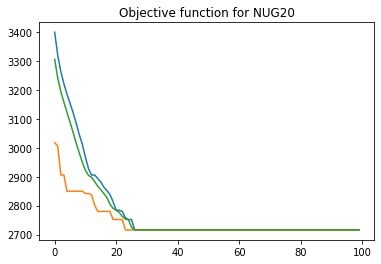

Min SGA: 2716.0, minimum objective func: 2570


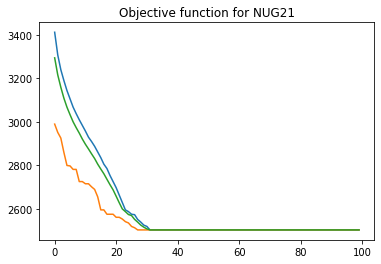

Min SGA: 2504.0, minimum objective func: 2438


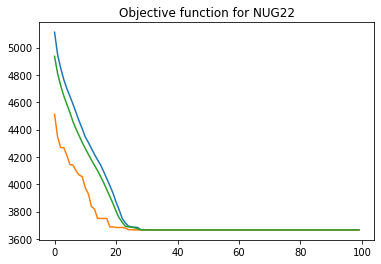

Min SGA: 3666.0, minimum objective func: 3596


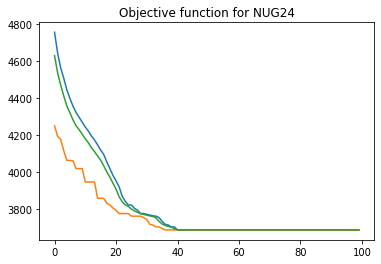

Min SGA: 3690.0, minimum objective func: 3488


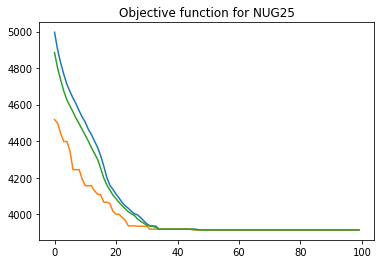

Min SGA: 3914.0, minimum objective func: 3744


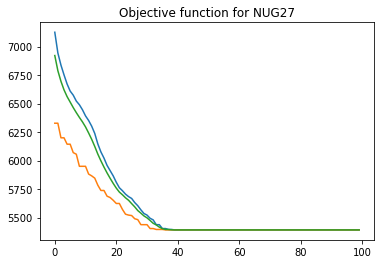

Min SGA: 5392.0, minimum objective func: 5234


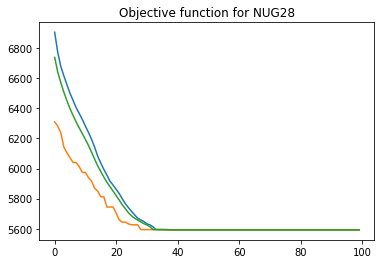

Min SGA: 5592.0, minimum objective func: 5166


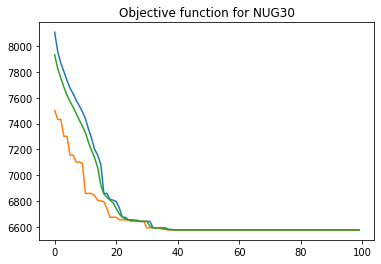

Min SGA: 6578.0, minimum objective func: 6124


In [5]:
NUGS = ['12', '14', '15', '16a', '16b', '17', '18', '20', '21', '22', '24', '25', '27', '28', '30']

for nug in NUGS:
    n, flow, dists, min_obj_func = get('nug'+nug)
    sga = SGA(population_size=500, chromosome_length=n, distance_matrix=dists, 
              objective_func=objective_function,number_of_iterations=100)
    sga.run()

    sga.plot_costs(f'Objective function for NUG{nug}')
    print(f'Min SGA: {sga.min_costs.min()}, minimum objective func: {min_obj_func}')

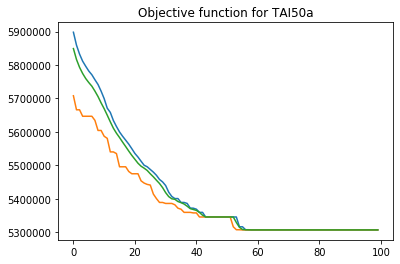

Min SGA: 5306986.0, minimum objective func: 4938796


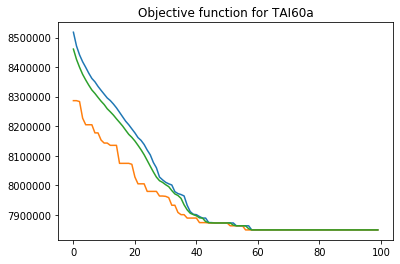

Min SGA: 7848918.0, minimum objective func: 7205962


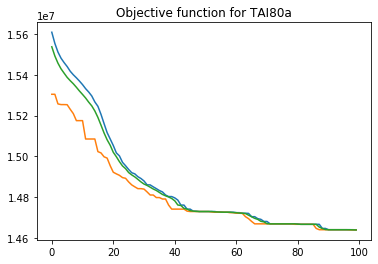

Min SGA: 14640154.0, minimum objective func: 13499184


In [6]:
TAIS = ['50a', '60a', '80a']

for tai in TAIS:
    n, flow, dists, min_obj_func = get('tai'+tai)
    sga = SGA(population_size=500, chromosome_length=n, distance_matrix=dists, 
              objective_func=objective_function,number_of_iterations=100)
    sga.run()

    sga.plot_costs(f'Objective function for TAI{tai}')
    print(f'Min SGA: {sga.min_costs.min()}, minimum objective func: {min_obj_func}')